In [3]:
# 1. Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [4]:
data = pd.read_csv('features_del.csv')
X = data.drop(columns=["label"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# 4. Model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# 5. Evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("PR-AUC:", average_precision_score(y_test, y_prob))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96       445
         1.0       0.99      0.94      0.96       555

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000

ROC-AUC: 0.9915335560279381
PR-AUC: 0.9948233117618636


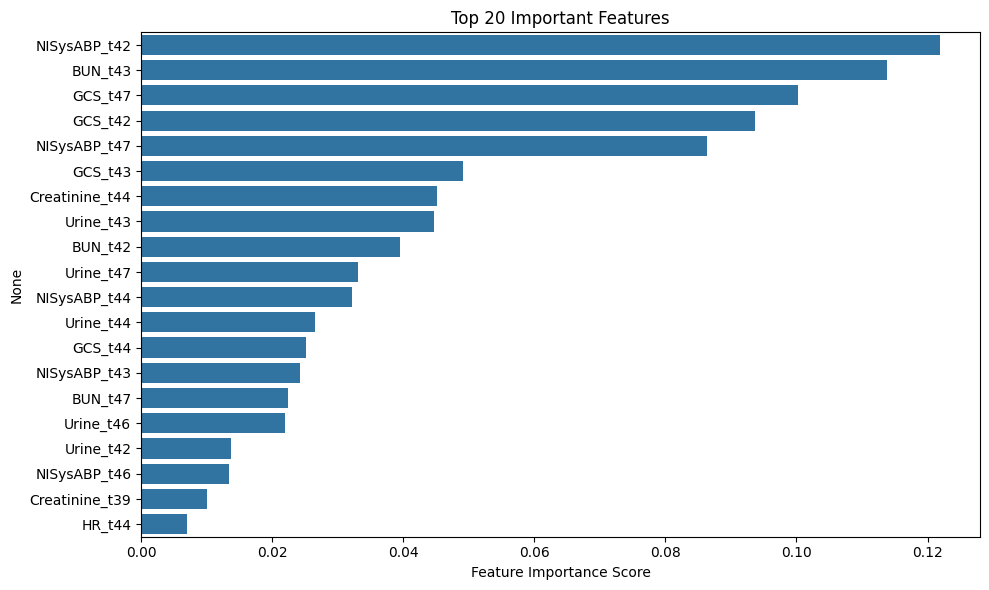

In [5]:
# Convert to DataFrame
# df_feat = pd.DataFrame(X_all, columns=dynamic_cols)

# 6. Feature Importance Plot
importances = model.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:20], y=feat_imp.index[:20])
plt.title("Top 20 Important Features")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()